# Индивиуальное задание

## Этап  № 2. Методы оценки статических характеристик, связанных с распределением пользователей на плоскости

_Выполнил_ студент 2 курса<br>
учебной группы НММ-02-22<br>
Мулин Иван

### Цели
1. Научиться строить функции распределения и плотности вероятности конкретной выборки с заданным распределением и изучать их.
2. Научиться анализировать статистические характеристики, связанные с распределением пользователей на плоскости.

### Задача
*Часть 1*

Сгенерировать выборку случайных чисел размером 100 и 1000 для двух распределений – экспоненциального и нормального. Для созданных выборок сделать следующее:
1. Посчитать выборочное среднее и дисперсию, сравнить с математическим ожиданием соответствующих распределений;
2. Посчитать 0.5 и 0.99 квантили, сравнить с соответствующими теоретическими значениями;
3. Построить гистограмму распределения;
4. Построить функцию распределения случайной величины на основе выборки (на одном графике показать функции распределения, полученные из выборок разного размера и теоретическую);
5. Построить плотность распределения случайной величины на основе выборки (на одном графике показать плотности распределения, полученные из выборок разного размера и теоретическую). В итоге проанализировать зависимость точности аппроксимации от количества экспериментов

*Часть 2*

Сгенерировать три выборки размера 100, 1000 и 10000 для случайных расстояний между двумя точками, равномерно распределенные в прямоугольнике со сторонами 10 и 30. Получить среднее значение расстояния между точками, построить функцию распределения вероятностей и плотности вероятностей случайных расстояний. Показать разницу между соответствующими функциями на одном графике

### Ход работы

Подключаем библиотеки `numpy` и `matplotlib`. Будем использовать метод `gaussian_kde` из `scipy.stats` для получения функций  вероятностей распределений. Для отображения функции нормального распределения понадобится функция `erf` из библиотеки `scipy`. Также добавляем модуль `IPython.display.Markdown` для автоматического заполнения ячеек таблиц в Markdown:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.special import erf

from IPython.display import Markdown as md

#### Часть 1

В этой части будем работать с выборками из 100 и 1000 элементов. Введём переменные:

In [2]:
A = 100
B = 1000

##### Нормальное распределение ― $\mathcal{N}_n(\mu, \sigma ^2)$

Укажем параметры распределения:

In [3]:
mean = 0
stdDeviation = 1

Создаём выборки с нормальным распределением:

In [4]:
normal1 = np.random.normal(mean, stdDeviation, size=A)
normal2 = np.random.normal(mean, stdDeviation, size=B)

Вычисляем выборочное среднее и дисперсию для обеих выборок:

In [5]:
nMean1 = np.mean(normal1)
nVar1 = np.var(normal1)

nMean2 = np.mean(normal2)
nVar2 = np.var(normal2)

In [6]:
print(f"For normal1 we get\nMean={nMean1}, Variance={nVar1}\n")
print(f"For normal2 we get\nMean={nMean2}, Variance={nVar2}\n")

For normal1 we get
Mean=0.094128859513765, Variance=0.9391666166735465

For normal2 we get
Mean=0.015163284030549576, Variance=1.001279984159398



Сравним полученные величины:

In [7]:
md("""
$Normal\ distribution\ \mathcal{{N}}_n(\mu, \sigma^2)$
| Quantity | Description | n={:d} | n={:d} | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$\mu(X_n)$$ | Mean of $X_n$ | {:.6f}... | {:.6f}... | $$\mu={:.3f}$$ |
| $$D[X_n]$$ | Variance of $X_n$ | {:.6f}... | {:.6f}... | $$\sigma ^2={:.3f}$$ |
""".format(A, B, nMean1, nMean2, mean, nVar1, nVar2, stdDeviation**2))


$Normal\ distribution\ \mathcal{N}_n(\mu, \sigma^2)$
| Quantity | Description | n=100 | n=1000 | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$\mu(X_n)$$ | Mean of $X_n$ | 0.094129... | 0.015163... | $$\mu=0.000$$ |
| $$D[X_n]$$ | Variance of $X_n$ | 0.939167... | 1.001280... | $$\sigma ^2=1.000$$ |


Посчитаем квантили уровней 0.5 и 0.99 для созданных выборок.

In [8]:
nQuantile11 = np.quantile(normal1, 0.5)
nQuantile12 = np.quantile(normal1, 0.99)

nQuantile21 = np.quantile(normal2, 0.5)
nQuantile22 = np.quantile(normal2, 0.99)

In [9]:
print(f"For normal1 we get\n0.5-quantile={nQuantile11}, 0.99-quantile={nQuantile12}\n")
print(f"For normal2 we get\n0.5-quantile={nQuantile21}, 0.99-quantile={nQuantile22}\n")

For normal1 we get
0.5-quantile=0.05549552182508146, 0.99-quantile=2.1032769838657868

For normal2 we get
0.5-quantile=0.05919447813211716, 0.99-quantile=2.2686366828971885



Резюмируем полученные результаты:

In [10]:
md("""
$Some\ quantiles\ for\ \mathcal{{N}}_n(\mu, \sigma^2)$
| Quantile | Description | n={:d} | n={:d} | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$x_{{0.5}}$$ | 0.5-quantile of $X_n$ | {:.6f}... | {:.6f}... | $$x_{{0.5}}={:.3f}$$ |
| $$x_{{0.99}}$$ | 0.99-quantile of $X_n$ | {:.6f}... | {:.6f}... | $$x_{{0.99}}={:.3f}$$ |
""".format(A, B, nQuantile11, nQuantile21, 0, nQuantile12, nQuantile22, 2.326))


$Some\ quantiles\ for\ \mathcal{N}_n(\mu, \sigma^2)$
| Quantile | Description | n=100 | n=1000 | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$x_{0.5}$$ | 0.5-quantile of $X_n$ | 0.055496... | 0.059194... | $$x_{0.5}=0.000$$ |
| $$x_{0.99}$$ | 0.99-quantile of $X_n$ | 2.103277... | 2.268637... | $$x_{0.99}=2.326$$ |


Построим гистограммы для созданных выборок:

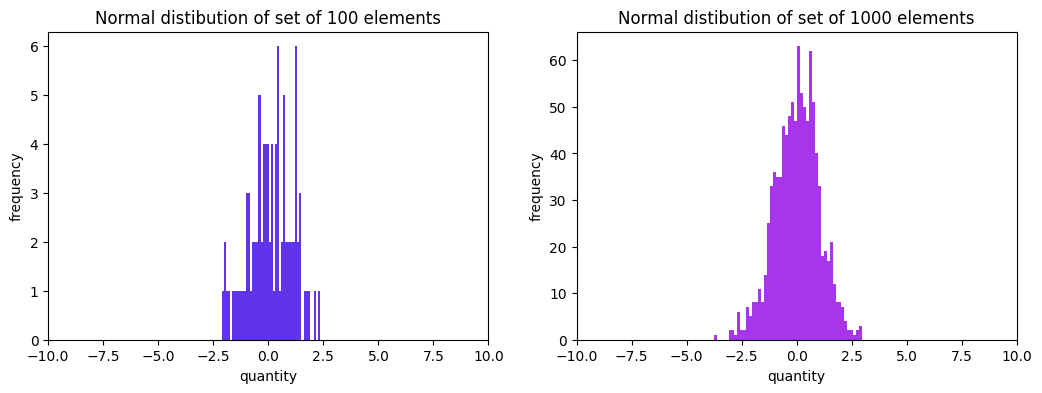

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12.5, 4))
plt.setp((ax1, ax2), xlabel="quantity", ylabel="frequency")
l = 10

ax1.hist(normal1, bins=50, color="#6134eb")
ax1.set_title("Normal distibution of set of %d elements" % A)
ax1.set_xlim(-l, l)

ax2.hist(normal2, bins=50, color="#a834eb")
ax2.set_title("Normal distibution of set of %d elements" % B)
ax2.set_xlim(-l, l)

print("")

Требуется изобразить следующие функции нормального распределения: теоретическую, для выборки из 100 элементов и выборки из 1000 элементов. Теоретическая функция нормального распределения имеет вид
$$ \Phi \bigg( \frac{x-\mu}{\sigma} \bigg) = \frac{1}{2} \bigg\{ 1+ erf \bigg( \frac{1}{\sqrt2} \frac{x-\mu}{\sigma} \bigg) \bigg\}$$

In [12]:
def nCDF(t):
    return (1 + erf(t/(2**0.5)))*0.5

In [13]:
nTheoreticDomain = np.linspace(-l, l, A)
nTheoreticCDFY = nCDF((nTheoreticDomain - mean)/stdDeviation)

normal1CopyX = np.copy(normal1)
normal2CopyX = np.copy(normal2)

normal1CopyX.sort()
normal2CopyX.sort()

In [14]:
normal1CopyY = np.arange(0, 1, 1/A)
normal2CopyY = np.arange(0, 1, 1/B)

asymptoteY = np.ones(A)

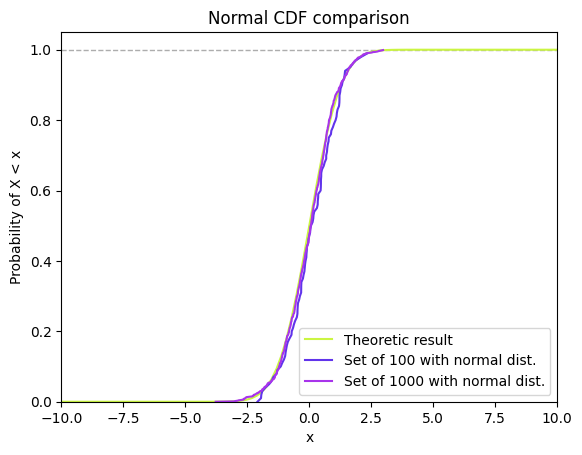

In [15]:
plt.figure(dpi=100)
plt.title("Normal CDF comparison")

plt.plot(nTheoreticDomain, asymptoteY, color="#adadad", linestyle="dashed", linewidth=1)
plt.plot(nTheoreticDomain, nTheoreticCDFY, color="#cbf542", label="Theoretic result")
plt.plot(normal1CopyX, normal1CopyY, color="#6134eb", label=f"Set of {A} with normal dist.")
plt.plot(normal2CopyX, normal2CopyY, color="#a834eb", label=f"Set of {B} with normal dist.")
plt.xlim(-l, l)
plt.ylim(0, 1.05)
plt.xlabel("x")
plt.ylabel("Probability of X < x")

plt.legend()
plt.show()
print()

Также изобразим графики функций плотностей вероятности. Теоретическая функция плотности вероятности имеет вид
$$ \Pi(\mu, \sigma, x) = \frac{d \Phi (\tau)}{d \tau} \Bigg| _{\tau = \frac{x-\mu}{\sigma}} = \frac{1}{\sigma \sqrt{2 \pi}} exp \bigg\{ - \bigg( \frac{x-\mu}{\sqrt2 \sigma} \bigg) ^2 \bigg\} $$

In [16]:
def nPDF(mean, stdDeviation, domain):
    z = ((domain - mean) / stdDeviation)**2
    u = 1/(stdDeviation * (2 * np.pi)**0.5)
    return u * np.exp(-0.5*z)

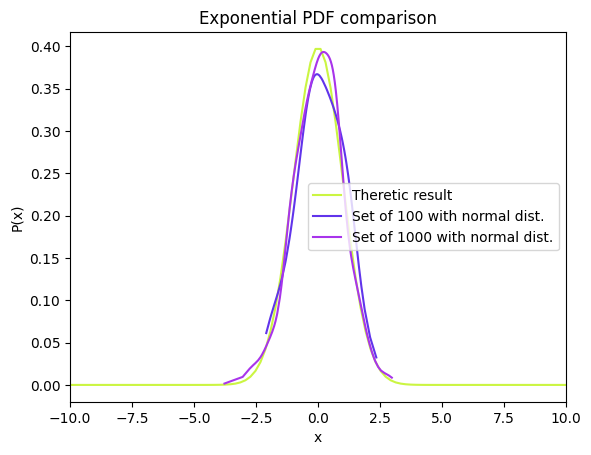

In [17]:
nTheoreticPDFY = nPDF(mean, stdDeviation, nTheoreticDomain)

plt.figure(dpi=100)
plt.title("Exponential PDF comparison")

normal1PDFY = gaussian_kde(normal1CopyX).evaluate(normal1CopyX)
normal2PDFY = gaussian_kde(normal2CopyX).evaluate(normal2CopyX)

plt.plot(nTheoreticDomain, nTheoreticPDFY, color="#cbf542", label="Theretic result")
# plt.hist(normal1, bins=50, density=True, color="#6134eb", alpha=0.2)
plt.plot(normal1CopyX, normal1PDFY, color="#6134eb", label=f"Set of {A} with normal dist.")
# plt.hist(normal2, bins=50, density=True, color="#a834eb", alpha=0.2)
plt.plot(normal2CopyX, normal2PDFY, color="#a834eb", label=f"Set of {B} with normal dist.")

plt.xlim(-l, l)
plt.xlabel("x")
plt.ylabel("P(x)")

plt.legend()
plt.show()
print()

Эти же действия произведём и над экспоненциальным рапределением.

##### Экспоненциальное распределение ― $\mathcal{E}_n(\lambda)$

In [18]:
parameter = 1
scale = 1/parameter

Создадим выборки с экспоненциальным распределением:

In [19]:
exp1 = np.random.exponential(scale, size=A)
exp2 = np.random.exponential(scale, size=B)

Вычислим выборочное среднее и дисперсию для обеих выборок:

In [20]:
eMean1 = np.mean(exp1)
eVar1 = np.var(exp1)

eMean2 = np.mean(exp2)
eVar2 = np.var(exp2)

In [21]:
print(f"For exp1 we get\nMean={eMean1}, Variance={eVar1}\n")
print(f"For exp2 we get\nMean={eMean2}, Variance={eVar2}\n")

For exp1 we get
Mean=0.773903776744732, Variance=0.6043046316163234

For exp2 we get
Mean=0.9509320510621883, Variance=0.8597547350912321



Сравним полученные величины:

In [22]:
md("""
$Normal\ distribution\ \mathcal{{E}}_n(\lambda)$
| Quantity | Meaning | n={:d} | n={:d} | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$\mu(X_n)$$ | Mean of $Y_n$ | {:.6f}... | {:.6f}... | $$\lambda ^{{-1}}={:.3f}$$ |
| $$D[X_n]$$ | Variance of $Y_n$ | {:.6f}... | {:.6f}... | $$\lambda ^{{-2}}={:.3f}$$ |
""".format(A, B, eMean1, eMean2, scale, eVar1, eVar2, scale**2))


$Normal\ distribution\ \mathcal{E}_n(\lambda)$
| Quantity | Meaning | n=100 | n=1000 | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$\mu(X_n)$$ | Mean of $Y_n$ | 0.773904... | 0.950932... | $$\lambda ^{-1}=1.000$$ |
| $$D[X_n]$$ | Variance of $Y_n$ | 0.604305... | 0.859755... | $$\lambda ^{-2}=1.000$$ |


Вычислим квантили порядка 0.5 и 0.99 для созданных выборок:

In [23]:
eQuantile11 = np.quantile(exp1, 0.5)
eQuantile12 = np.quantile(exp1, 0.99)

eQuantile21 = np.quantile(exp2, 0.5)
eQuantile22 = np.quantile(exp2, 0.99)

In [24]:
print(f"For exp1 we get\n0.5-quantile={eQuantile11}, 0.99-quantile={eQuantile12}\n")
print(f"For exp2 we get\n0.5-quantile={eQuantile21}, 0.99-quantile={eQuantile22}\n")

For exp1 we get
0.5-quantile=0.49204952092570486, 0.99-quantile=2.8586126123906017

For exp2 we get
0.5-quantile=0.6584102715631764, 0.99-quantile=4.340472851404741



Сравним полученные результаты:

In [25]:
md("""
$Some\ quantiles\ for\ \mathcal{{E}}_n(\lambda)$
| Quantity | Meaning | n={:d} | n={:d} | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$y_{{0.5}}$$ | 0.5-quantile of $Y_n$ | {:.6f}... | {:.6f}... | $$y_{{0.5}} = \ln(2)\cdot\lambda ^{{-1}} = {:.3f}...$$ |
| $$y_{{0.99}}$$ | 0.99-quantile of $Y_n$ | {:.6f}... | {:.6f}... | $$y_{{0.99}} = \ln(100)\cdot\lambda ^{{-1}} = {:.3f}...$$ |
""".format(A, B, eQuantile11, eQuantile12, np.log(2)*scale, eQuantile21, eQuantile21, np.log(100)*scale))


$Some\ quantiles\ for\ \mathcal{E}_n(\lambda)$
| Quantity | Meaning | n=100 | n=1000 | Theoretical value |
|----------|:-------:|-------|--------|-------------------|
| $$y_{0.5}$$ | 0.5-quantile of $Y_n$ | 0.492050... | 2.858613... | $$y_{0.5} = \ln(2)\cdot\lambda ^{-1} = 0.693...$$ |
| $$y_{0.99}$$ | 0.99-quantile of $Y_n$ | 0.658410... | 0.658410... | $$y_{0.99} = \ln(100)\cdot\lambda ^{-1} = 4.605...$$ |


Изобразим гистограммы полученных выборок:

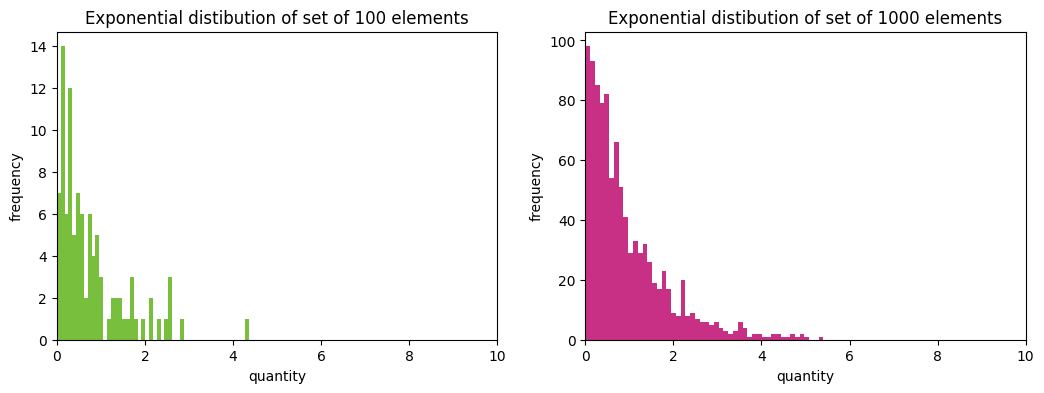

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12.5, 4))
plt.setp((ax1, ax2), xlabel="quantity", ylabel="frequency")

ax1.hist(exp1, bins=50,color="#78bf3d")
ax1.set_title("Exponential distibution of set of %d elements" % A)
ax1.set_xlim(0, l)

ax2.hist(exp2, bins=50, color="#c73085")
ax2.set_title("Exponential distibution of set of %d elements" % B)
ax2.set_xlim(0, l)

print()

На одном графике покажем функции экспоненциального распределения: теоретическую и для выборок из 100 и 1000 элементов. Теоретическая функция экспоненциального распределения выражается как
$$ C(\lambda, x) = 1-e^{-\lambda x} $$

In [27]:
eTheoreticDomain = np.linspace(0, l, A)

eTheoreticCDFY = 1 - np.exp(-parameter * eTheoreticDomain)

exp1CopyX = np.copy(exp1)
exp2CopyX = np.copy(exp2)

exp1CopyX.sort()
exp2CopyX.sort()

In [28]:
exp1CopyY = np.arange(0, 1, 1/A)
exp2CopyY = np.arange(0, 1, 1/B)

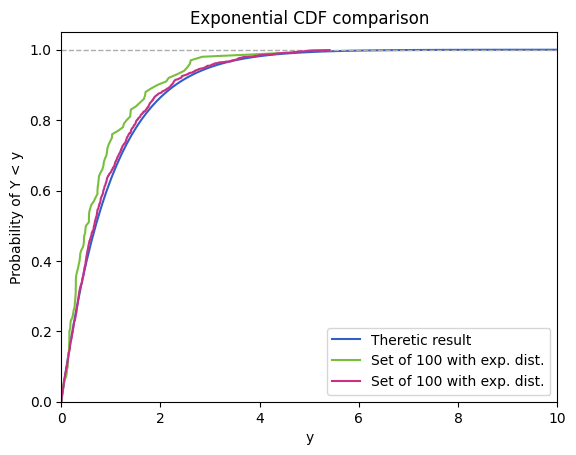

In [29]:
plt.figure(dpi=100)
plt.title("Exponential CDF comparison")

plt.plot(eTheoreticDomain, eTheoreticCDFY, color="#3060c7", label="Theretic result")
plt.plot(eTheoreticDomain, asymptoteY, color="#adadad", linestyle="dashed", linewidth=1)
plt.plot(exp1CopyX, exp1CopyY, color="#78bf3d", label=f"Set of {A} with exp. dist.")
plt.plot(exp2CopyX, exp2CopyY, color="#c73085", label=f"Set of {A} with exp. dist.")
plt.xlim(0, l)
plt.ylim(0, 1.05)
plt.xlabel("y")
plt.ylabel("Probability of Y < y")

plt.legend()
plt.show()
print()

Построим графики функций плотности вероятности. Функция плотности вероятности экпоненциального распределения вычисляется по формуле
$$ \Lambda (\lambda, x) = \frac{\partial C}{\partial x}(\lambda, x) = \lambda e^{-\lambda x}$$

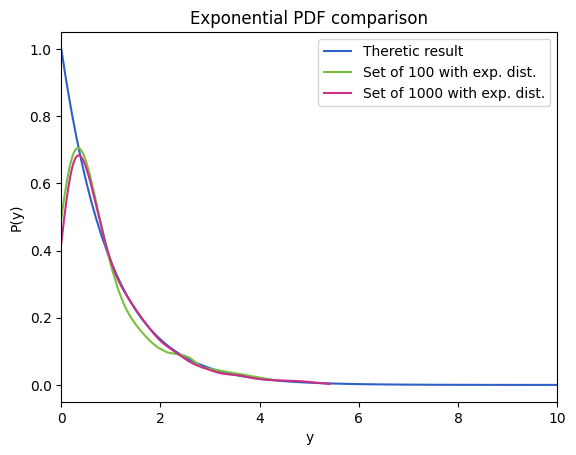

In [30]:
eTheoreticPDFY = parameter * np.exp(-parameter * eTheoreticDomain)

plt.figure(dpi=100)
plt.title("Exponential PDF comparison")

exp1PDFY = gaussian_kde(exp1CopyX).evaluate(exp1CopyX)
exp2PDFY = gaussian_kde(exp2CopyX).evaluate(exp2CopyX)

plt.plot(eTheoreticDomain, eTheoreticPDFY, color="#3060c7", label="Theretic result")
plt.plot(exp1CopyX, exp1PDFY, color="#78bf3d", label=f"Set of {A} with exp. dist.")
plt.plot(exp2CopyX, exp2PDFY, color="#c73085", label=f"Set of {B} with exp. dist.")

plt.xlim(0, l)
plt.xlabel("y")
plt.ylabel("P(y)")

plt.legend()
plt.show()
print()

*Вывод*

Как видим из полученных графиков, с ростом количества экспериментов поточечно нивелируется абсолютная погрешность измерений, то есть
$$ \Delta (\tilde x_n) \to 0\ \text{при}\ n \to +\infty, $$
где $n$ ― число экспериментов. Стремление абсолютной (а значит, и относительной) погрешности к нулю означает приближение экспериментальных данных к теоретическим, что и наблюдается на построенных графиках.
Кроме того, последовательность функций плотности вероятности поточечно стремится к своему теоретическому значению гораздо быстрее, чем функция распределения.

#### Часть 2

По заданию на прямоугольнике $\mathbb{L} \subset \mathbb{R}^2$ со сторонами H=10, W=30 равномерно распределены пары $q_1, q_2, \cdots, q_n \in \mathbb{R}^2 \times \mathbb{R}^2\ (n=100, 1000, 10000)$ точек. Равномерное распределение точек означет равномерное распределение расстояний между ними. Именно поэтому будем работать с выборкой расстояний между точками, абстрагируясь от  расположения точек.

Введём необходимые переменные и вычислим диагональ прямоугольника.

In [31]:
A, B, C = 100, 1000, 10000
H, W = 10, 30

diagonal = (H**2 + W**2)**0.5

Создадим выборки расстояний и вычислим их среднее значение:

In [32]:
distancesA = np.random.uniform(0, diagonal, A)
distancesB = np.random.uniform(0, diagonal, B)
distancesC = np.random.uniform(0, diagonal, C)

averageA = np.average(distancesA)
averageB = np.average(distancesB)
averageC = np.average(distancesC)

In [33]:
md("""
| Quantity | $$D_{{100}}$$ | $$D_{{1000}}$$ | $$D_{{10000}}$$ |
|----------|-----------|------------|-------------|
| $$Avg(D_n)$$ | {:6f} | {:6f} | {:6f} |
""".format(averageA, averageB, averageC))


| Quantity | $$D_{100}$$ | $$D_{1000}$$ | $$D_{10000}$$ |
|----------|-----------|------------|-------------|
| $$Avg(D_n)$$ | 17.108574 | 16.024730 | 15.875225 |


Построим фукнции распределения для трёх выборок.

In [34]:
distancesDomainA = np.linspace(0, diagonal, A)
distancesDomainB = np.linspace(0, diagonal, B)
distancesDomainC = np.linspace(0, diagonal, C)

distancesACopy = np.copy(distancesA)
distancesBCopy = np.copy(distancesB)
distancesCCopy = np.copy(distancesC)

distancesACopy.sort()
distancesBCopy.sort()
distancesCCopy.sort()

distancesAY = np.arange(0, 1, 1/A)
distancesBY = np.arange(0, 1, 1/B)
distancesCY = np.arange(0, 1, 1/C)

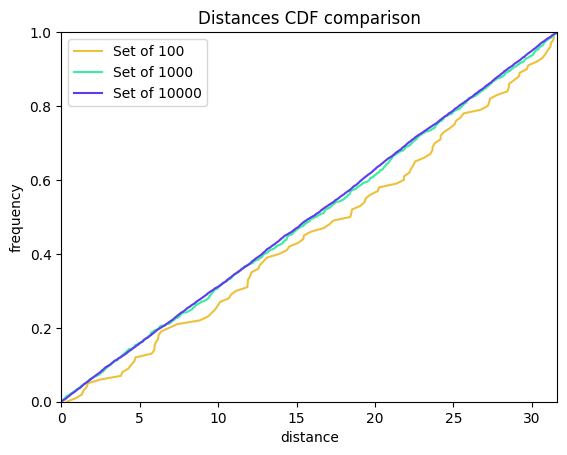

In [35]:
plt.figure(dpi=100)
plt.title("Distances CDF comparison")

plt.plot(distancesACopy, distancesAY, color="#edc13b", label=f"Set of {A}")
plt.plot(distancesBCopy, distancesBY, color="#3beda0", label=f"Set of {B}")
plt.plot(distancesCCopy, distancesCY, color="#5f3bed", label=f"Set of {C}")

plt.xlim(0, diagonal)
plt.ylim(0, 1)
plt.xlabel("distance")
plt.ylabel("frequency")

plt.legend()
plt.show()
print()

Изобразим плотности вероятности выборок:

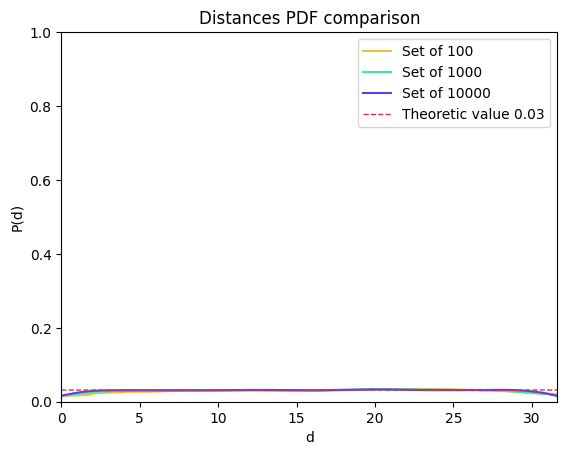

In [39]:
plt.figure(dpi=100)
plt.title("Distances PDF comparison")

dAY = gaussian_kde(distancesACopy).evaluate(distancesACopy)
dBY = gaussian_kde(distancesBCopy).evaluate(distancesBCopy)
dCY = gaussian_kde(distancesCCopy).evaluate(distancesCCopy)

averageY = np.ones(len(distancesDomainC)) / diagonal

plt.plot(distancesDomainA, dAY, color="#edc13b", label=f"Set of {A}")
plt.plot(distancesDomainB, dBY, color="#3beda0", label=f"Set of {B}")
plt.plot(distancesDomainC, dCY, color="#5f3bed", label=f"Set of {C}")
plt.plot(distancesDomainC, averageY, color="#cf344d", label=f"Theoretic value {1/diagonal:.2f}", linewidth=1, linestyle="dashed")

plt.xlim(0, diagonal)
plt.ylim(0, 1)
plt.xlabel("d")
plt.ylabel("P(d)")

plt.legend()
plt.show()
print()

### Результаты

В процессе выполнения этапа 2 индивидуальнго задания были изучены способы построения функции распределения и плотности вероятности для выборок с нормальным, экспоненциальным и равномерным распределением. Была проанализирована зависимость точности приближения от количества экспериментов.